<a href="https://colab.research.google.com/github/mzaheen610/Machine-Learning/blob/main/SVD_on_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt


[[209. 209. 209. ... 107. 108. 108.]
 [209. 209. 209. ... 105. 105. 105.]
 [208. 209. 209. ... 103. 103. 103.]
 ...
 [ 10.   9.   9. ...  26.  28.  29.]
 [ 10.   9.   9. ...  26.  28.  30.]
 [ 10.   9.   9. ...  26.  28.  30.]]
(2000, 3000)


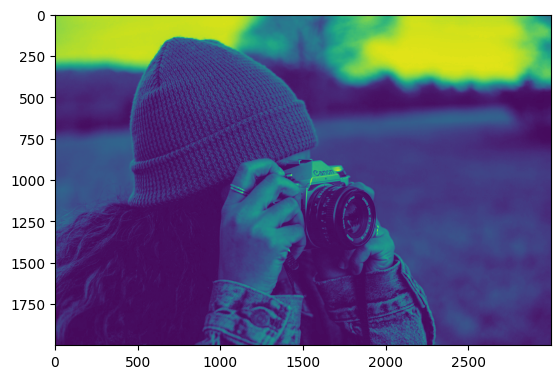

In [4]:
#Loading the image
url = "/content/sample_image.jpg"
img = io.imread(url)
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image)
image_mat = np.array(gray_image, dtype=np.float32) #Matrix representation of the image
print(image_mat)
print(image_mat.shape)

Scale the image before SVD


In [10]:
img_mat_scaled = (image_mat - image_mat.mean()) / image_mat.std()
print(image_mat)
print(image_mat - image_mat.mean())
print(img_mat_scaled)

[[209. 209. 209. ... 107. 108. 108.]
 [209. 209. 209. ... 105. 105. 105.]
 [208. 209. 209. ... 103. 103. 103.]
 ...
 [ 10.   9.   9. ...  26.  28.  29.]
 [ 10.   9.   9. ...  26.  28.  30.]
 [ 10.   9.   9. ...  26.  28.  30.]]
[[144.19699 144.19699 144.19699 ...  42.197    43.197    43.197  ]
 [144.19699 144.19699 144.19699 ...  40.197    40.197    40.197  ]
 [143.19699 144.19699 144.19699 ...  38.197    38.197    38.197  ]
 ...
 [-54.803   -55.803   -55.803   ... -38.803   -36.803   -35.803  ]
 [-54.803   -55.803   -55.803   ... -38.803   -36.803   -34.803  ]
 [-54.803   -55.803   -55.803   ... -38.803   -36.803   -34.803  ]]
[[ 2.1708057   2.1708057   2.1708057  ...  0.6352524   0.6503069
   0.6503069 ]
 [ 2.1708057   2.1708057   2.1708057  ...  0.60514355  0.60514355
   0.60514355]
 [ 2.1557515   2.1708057   2.1708057  ...  0.5750347   0.5750347
   0.5750347 ]
 ...
 [-0.82502884 -0.84008324 -0.84008324 ... -0.5841577  -0.5540488
  -0.5389944 ]
 [-0.82502884 -0.84008324 -0.84008324 

In [12]:
#Calculationg the SVD
u,s,vh = np.linalg.svd(img_mat_scaled)
print(u)
print(s)
print(vh)

[[ 0.05236553  0.02223294  0.03191918 ...  0.0179691   0.02376425
  -0.05438005]
 [ 0.05235125  0.02221447  0.03202205 ... -0.03720751 -0.0418089
   0.14324985]
 [ 0.05231867  0.02225187  0.03223285 ...  0.03107814  0.0665224
  -0.09093793]
 ...
 [-0.01413729 -0.01569347  0.01726979 ...  0.00092516 -0.01090949
   0.03802634]
 [-0.01417137 -0.01579679  0.01714055 ... -0.00883959  0.01994456
  -0.03475686]
 [-0.01419037 -0.01588334  0.01690494 ...  0.00657165 -0.00906829
   0.01484779]]
[2.1393984e+03 7.8472986e+02 4.3497513e+02 ... 5.2815612e-02 5.1700640e-02
 5.0299697e-02]
[[ 0.01879403  0.01877368  0.01876694 ...  0.01419159  0.01413037
   0.01408806]
 [ 0.00440726  0.00423087  0.00409326 ... -0.00381109 -0.00382511
  -0.00381672]
 [-0.01764876 -0.01760701 -0.01752254 ...  0.00538903  0.00531183
   0.00518858]
 ...
 [-0.01755027  0.0347347  -0.03280773 ...  0.4099081  -0.1375914
  -0.02015464]
 [ 0.01317167 -0.01746702 -0.01500746 ... -0.1464155   0.43989336
  -0.1659385 ]
 [-0.00904

Computing variance explained by singular values.

In [13]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
print(variance_explained)

[0.763 0.103 0.032 ... 0.    0.    0.   ]


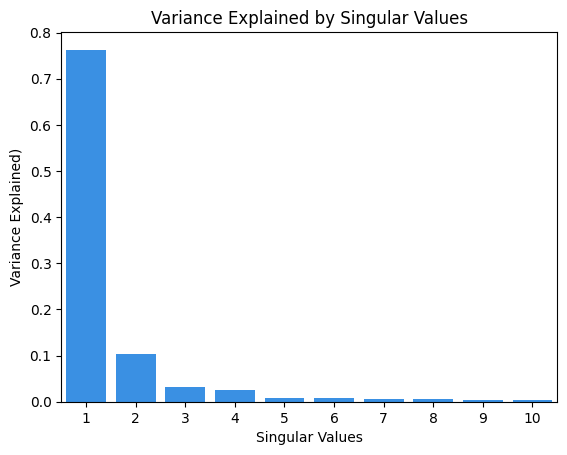

In [39]:
#Plotting the singular vectors
import seaborn as sns
sns.barplot(x= list(range(1,11)), y=variance_explained[0:10], color="dodgerblue")
plt.title('Variance Explained by Singular Values')
plt.xlabel('Singular Values')
plt.ylabel('Variance Explained)')
plt.show()

Reconstructing the original image from the SVD. (After low rank approx.)

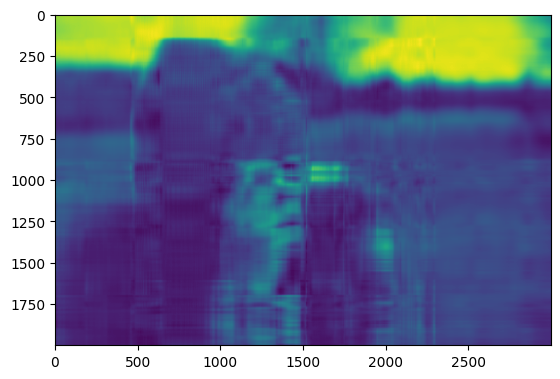

In [50]:
num_components = 10
reconstructed_image = np.dot(u[:, :num_components], np.dot(np.diag(s[:num_components]), vh[:num_components, :]))
plt.imshow(reconstructed_image)

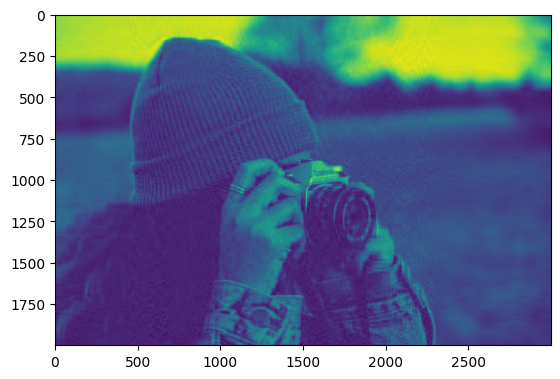

In [51]:
num_components = 50
reconstructed_image = np.dot(u[:, :num_components], np.dot(np.diag(s[:num_components]), vh[:num_components, :]))
plt.imshow(reconstructed_image)

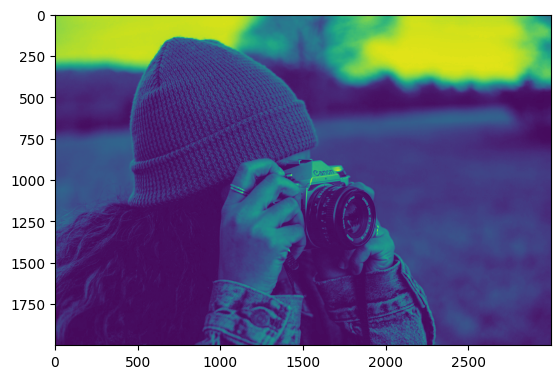

In [44]:
plt.imshow(gray_image)